In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint, adfuller
import seaborn

In [2]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [3]:

start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2025,2,10)

tickers = ['AAPL', 'NVDA', 'MSFT', 'QCOM', 'AMD', 'INTU']

df = yf.download(tickers, start, end)['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  6 of 6 completed


[('AAPL', 'AMD'), ('AAPL', 'MSFT'), ('AAPL', 'QCOM'), ('AMD', 'INTU'), ('AMD', 'MSFT'), ('AMD', 'QCOM'), ('INTU', 'MSFT'), ('INTU', 'QCOM'), ('MSFT', 'QCOM')]


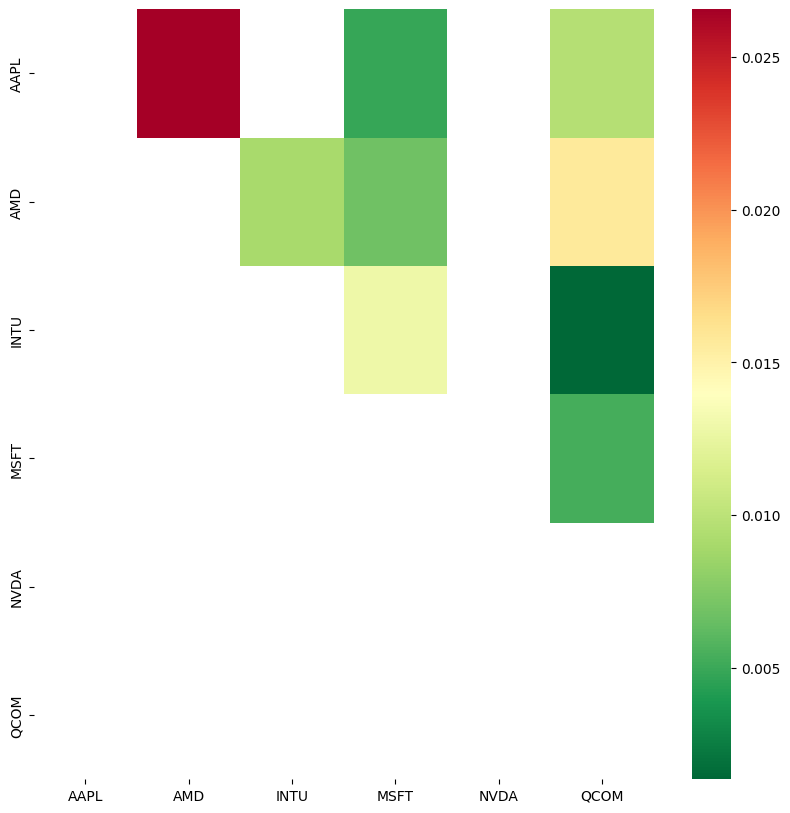

In [4]:
scores, pvalues, pairs = find_cointegrated_pairs(df)
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=df.columns, yticklabels=df.columns, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )
print(pairs)

[*********************100%***********************]  2 of 2 completed


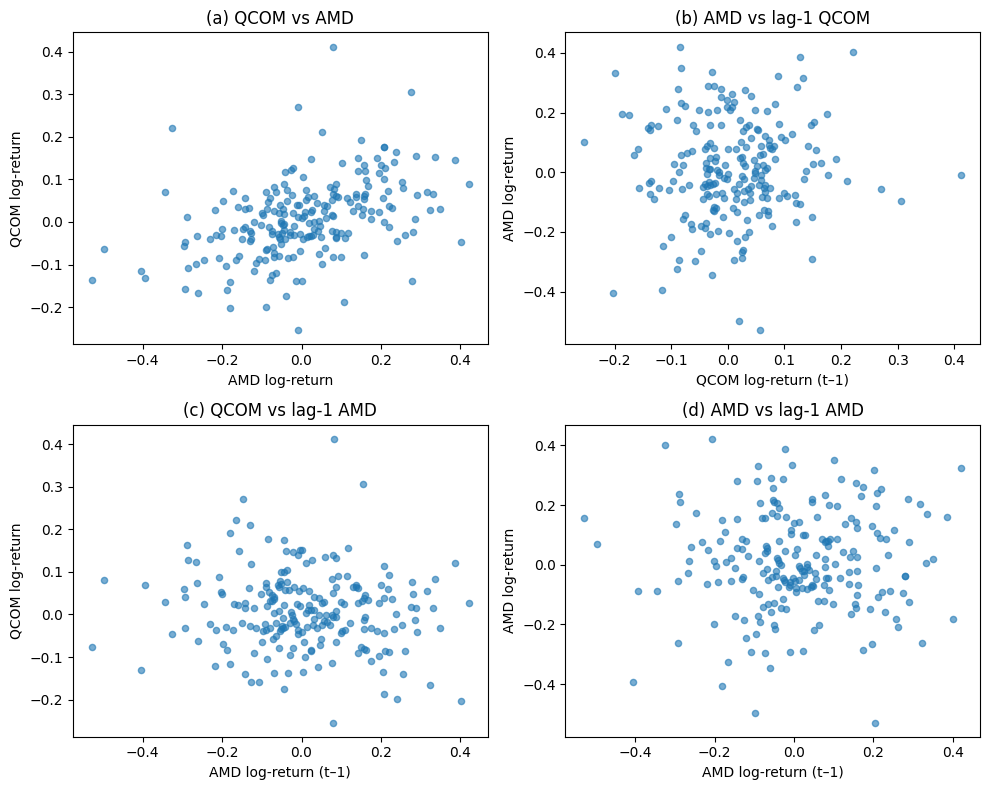

In [5]:
tickers = ["QCOM", "AMD"]
raw = yf.download(tickers, start="2007-01-01", end="2025-02-10")["Close"]

# 3) Resample to month-end and compute log-returns
monthly = raw.resample("M").last()
logret = np.log(monthly / monthly.shift(1))

# 4) Create 1‐month lags
logret["QCOM_lag1"] = logret["QCOM"].shift(1)
logret["AMD_lag1"]  = logret["AMD"].shift(1)

# 5) Drop any rows with NaNs (first row, etc.)
df = logret.dropna()

# 6) Make 2×2 scatterplot, mirroring panels (a)–(d) in your figure
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# (a) concurrent QCOM vs AMD
axes[0,0].scatter(df["AMD"], df["QCOM"], alpha=0.6, s=20)
axes[0,0].set_xlabel("AMD log-return")
axes[0,0].set_ylabel("QCOM log-return")
axes[0,0].set_title("(a) QCOM vs AMD")

# (b) AMD vs lag-1 QCOM
axes[0,1].scatter(df["QCOM_lag1"], df["AMD"], alpha=0.6, s=20)
axes[0,1].set_xlabel("QCOM log-return (t–1)")
axes[0,1].set_ylabel("AMD log-return")
axes[0,1].set_title("(b) AMD vs lag-1 QCOM")

# (c) QCOM vs lag-1 AMD
axes[1,0].scatter(df["AMD_lag1"], df["QCOM"], alpha=0.6, s=20)
axes[1,0].set_xlabel("AMD log-return (t–1)")
axes[1,0].set_ylabel("QCOM log-return")
axes[1,0].set_title("(c) QCOM vs lag-1 AMD")

# (d) AMD vs lag-1 AMD  (the “auto‐scatter” for AMD)
axes[1,1].scatter(df["AMD_lag1"], df["AMD"], alpha=0.6, s=20)
axes[1,1].set_xlabel("AMD log-return (t–1)")
axes[1,1].set_ylabel("AMD log-return")
axes[1,1].set_title("(d) AMD vs lag-1 AMD")

plt.tight_layout()
plt.show()

# Save the plot to the specified directory
plt.savefig("Project Report #3/plots/scatter_plot.png", bbox_inches='tight')
plt.close()
